In [1]:
# librerías
import os
import pandas as pd
import gower
from herramientas import mapData
import gc

In [2]:
# directorios
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')
image_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'images')

# imágenes a guardar
image_dataset_a = 'nmds_a.png'
image_dataset_b = 'nmds_b.png'

### Dataset A

In [3]:
dataset_a= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'))

In [4]:
# categorizar edad en dataset a


def categoria_edad (x):
    if (x >= 0) and (x <= 11) :
        return 'Niñez'
    elif (x >= 12) and (x <=18):
        return 'Adolescencia'
    elif (x >= 19) and (x <=30):
        return 'Juventud'
    elif (x>=31) and (x<=65) :
        return 'Vejez'
    elif x>=66:
        return 'Vejez mayor'
    else:
        return 'NS/NC'


dataset_a['victima_edad_cat'] = \
dataset_a.victima_edad.apply(categoria_edad)
dataset_a['llamante_edad_cat'] = \
dataset_a.llamante_edad.apply(categoria_edad)

In [5]:
# drop columnas sin usar

dataset_a.drop(['victima_edad', 'llamante_edad'], axis=1, inplace=True) 

In [6]:
# Mapeo de SI/NO/NSNC de "victima_convive_agresor" labels to 'y_convive'
y_convive = []
for value in dataset_a['victima_convive_agresor']:
    if value == 'SI':
        y_convive.append('SI')
    elif value == 'NO':
        y_convive.append('NO')
    else:
        y_convive.append('NS/NC')

gower para dataset_a hecho


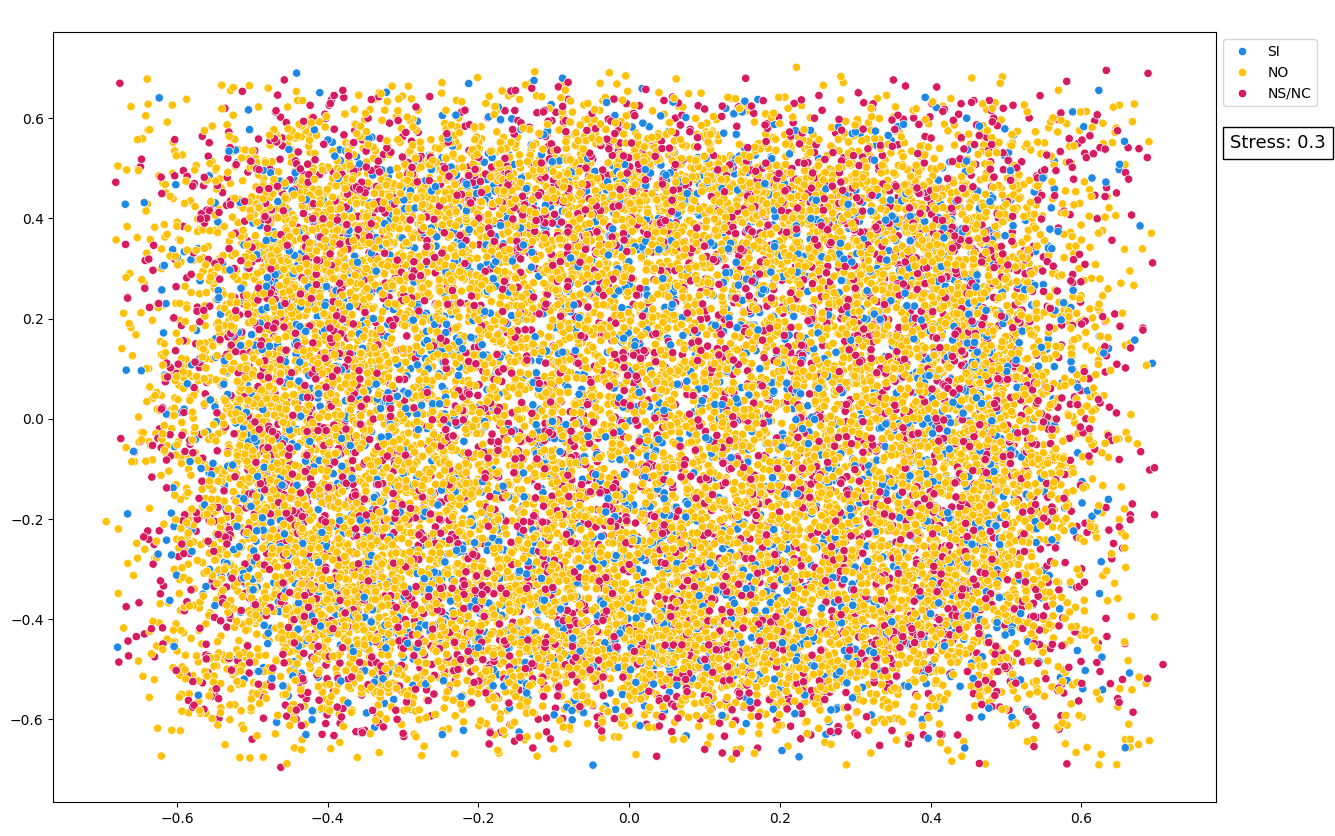

In [7]:
# Gower
gower_data_a = gower.gower_matrix(dataset_a)
print("gower para dataset_a hecho")


#graficar
mapData(gower_data_a, dataset_a, y_convive, False, ' ', image_path,image_dataset_a)

In [8]:
gc.collect()

4731

### Dataset B

In [9]:
llamados= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'))

In [10]:
llamados.drop(['llamante_edad'], axis=1, inplace=True) 

In [11]:
dataset_b = llamados[~llamados['victima_edad'].isnull()]

In [12]:
dataset_b.to_excel("/Users/vcolombo/Documents/tp especializacion/linea_137_llamados_vs/datasets/xlsx/llamados_dataset_b_graficar.xlsx", index=False)

In [13]:
del dataset_b

In [14]:
dataset_b= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_dataset_b_graficar.xlsx'))

In [15]:
# Mapeo de SI/NO/NSNC de "victima_convive_agresor" labels to 'y_convive'
y_convive = []
for value in dataset_b['victima_convive_agresor']:
    if value == 'SI':
        y_convive.append('SI')
    elif value == 'NO':
        y_convive.append('NO')
    else:
        y_convive.append('NS/NC')

gower para dataset_a hecho


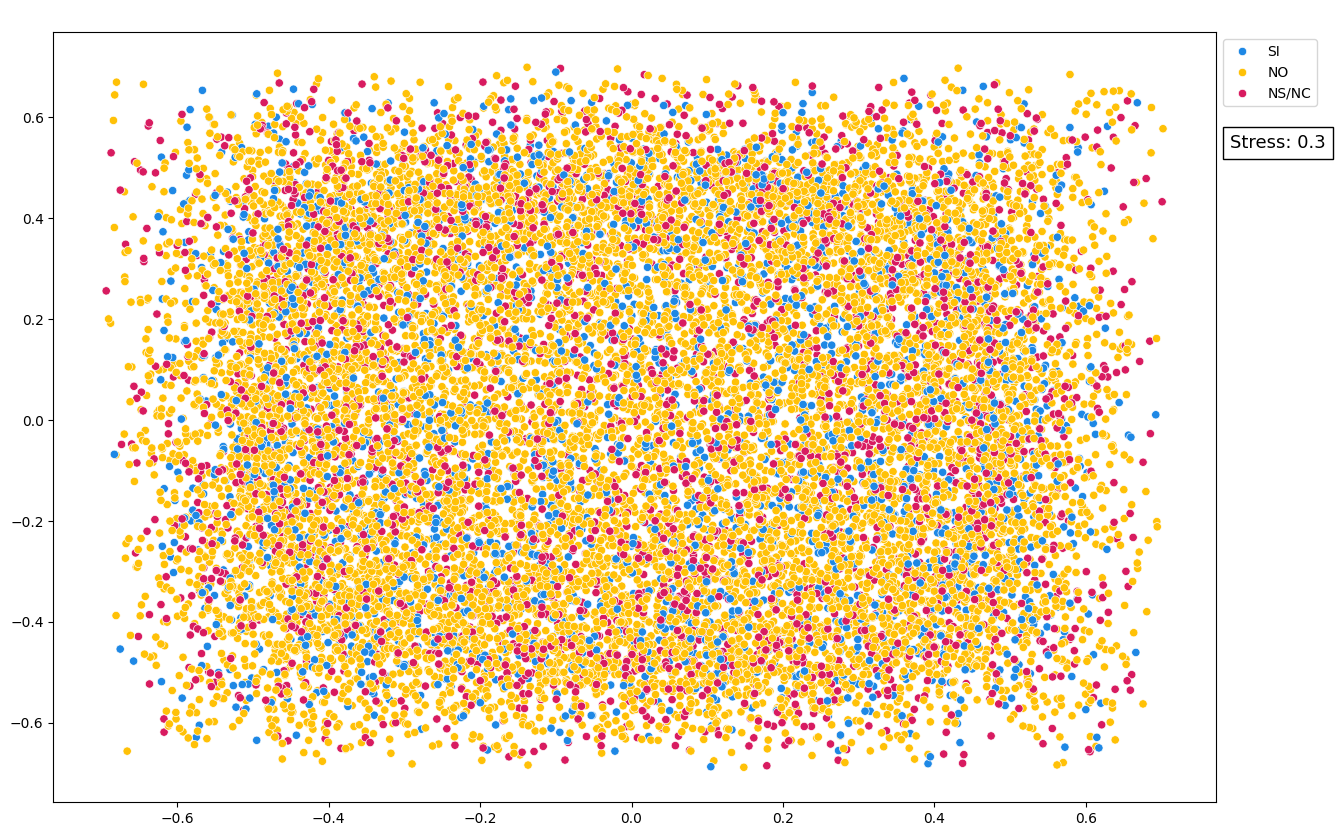

In [16]:
# Gower
gower_data_b = gower.gower_matrix(dataset_b)
print("gower para dataset_a hecho")


#graficar
mapData(gower_data_b, dataset_b, y_convive, False, ' ', image_path,image_dataset_b)